In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [3]:
!pip install catboost

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import load
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

model = load('./stacking_model.pkl')
df    = pd.read_csv('./train_real_final_3.csv')

--- Train Set Metrics ---
Accuracy : 0.8435502283105023
F1-score : 0.8420081849097931
AUC      : 0.9294819025387879

--- Validation Set Metrics ---
Accuracy : 0.6722209541200639
F1-score : 0.6718464351005484
AUC      : 0.7333949573876959



/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


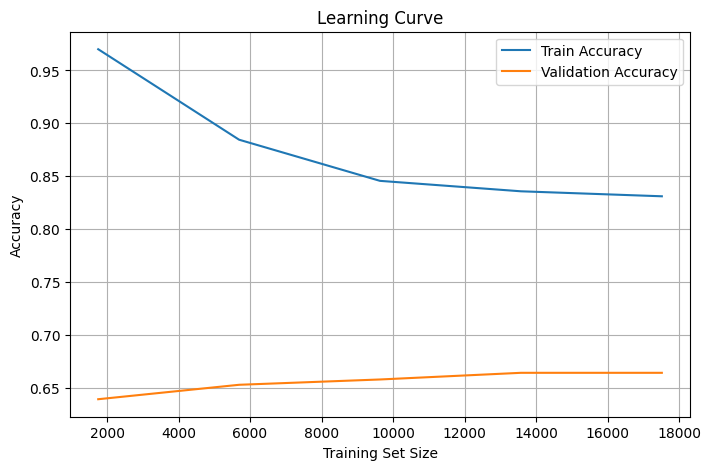

In [4]:
X = df.drop(columns=["id", "y", "shares"], errors="ignore")
y = df["y"]

# 3) 학습/검증 분할
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4) 성능 평가 함수
def evaluate(name, X_split, y_split):
    y_pred = model.predict(X_split)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_split)[:, 1]
    else:
        y_proba = model.decision_function(X_split)
    print(f"--- {name} Set Metrics ---")
    print("Accuracy :", accuracy_score(y_split, y_pred))
    print("F1-score :", f1_score(y_split, y_pred))
    print("AUC      :", roc_auc_score(y_split, y_proba))
    print()

# 5) Train vs Validation 성능 비교
evaluate("Train",      X_train, y_train)
evaluate("Validation", X_val,   y_val)

# 6) Learning Curve 그리기
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
val_mean   = np.mean(val_scores,   axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Train Accuracy")
plt.plot(train_sizes, val_mean,   label="Validation Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()
